In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [8]:
import os
%pwd

'/mnt/c/Users/sv/source/Enhancement/Image-Enchancer'

In [7]:
os.chdir("..")

In [58]:
def adjust_brightness_contrast(image, low_thresh, high_thresh):
    # Stretch the image intensity values to the full range [0, 255] based on low_thresh and high_thresh
    # Clip the values to ensure they are within [0, 255]
    image_adjusted = np.clip((image - low_thresh) * (255.0 / (high_thresh - low_thresh)), 0, 255).astype(np.uint8)
    # plt.imshow(image_adjusted)
    # plt.title("Adjusted Image")
    return image_adjusted

In [77]:
def calculate_percentiles(hist, percentiles=[1, 99]):
    cdf = hist.cumsum()
    cdf_normalized = cdf / cdf[-1]
    low_thresh = np.searchsorted(cdf_normalized, percentiles[0] / 100.0)
    high_thresh = np.searchsorted(cdf_normalized, percentiles[1] / 100.0)
    return low_thresh, high_thresh

In [52]:
# def calculate_percentiles(hist, percentiles=[2, 98]):
#     low_threshold = np.percentile(hist, 2)
#     high_threshold = np.percentile(hist, 98)
#     return low_threshold, high_threshold

In [70]:
def ProcessImage(imagepath):
    image_1 = cv2.imread(imagepath, cv2.IMREAD_COLOR)
    image_rgb = cv2.cvtColor(image_1, cv2.COLOR_BGR2RGB)
    # image_bgr = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR)
    # cv2.imwrite("original_image.jpg",image_bgr)
    
    # image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # plt.imshow(image)
    # plt.title("Original Image")

    hist = cv2.calcHist([image_rgb], [0], None, [256],[0,256])
    low_thresh,high_thresh =  calculate_percentiles(hist)
    print(low_thresh,high_thresh)
    adjusted_img = adjust_brightness_contrast(image_rgb,low_thresh,high_thresh)

    return adjusted_img
    

24 197


Text(0.5, 1.0, 'processed image')

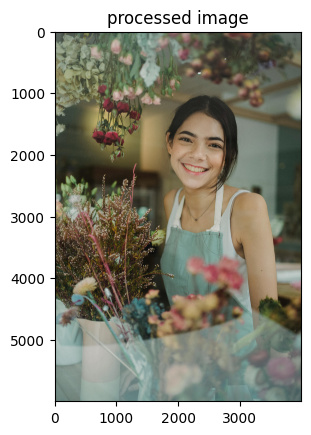

In [79]:
image_path = "./Dataset/pexels-amina-filkins-5409772.jpg"

pro_img = ProcessImage(image_path)
# image = cv2.cvtColor(pro_img, cv2.COLOR_RGB2BGR)
# cv2.imwrite("girlImage.jpg", image)
pro_img.save('./OutputImages/girl_image.jpg')
plt.imshow(pro_img)
plt.title("processed image")

In [66]:
import cv2
import numpy as np
from PIL import Image
 
def adjust_brightness_contrast(image, low_thresh, high_thresh):
    # Normalize the image using cv2.normalize
    image_adjusted = cv2.normalize(image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    # Clip the pixel values to ensure they remain within the range [0, 255]
    image_adjusted = np.clip(image_adjusted, 0, 255)
    return Image.fromarray(image_adjusted)
 
# Example usage
image_path = "./Dataset/pexels-bertellifotografia-5477509.jpg"
image = cv2.imread(image_path,cv2.IMREAD_COLOR)

 
# Convert thresholds from percentage to pixel values
hist = cv2.calcHist([image], [0], None, [256],[0,256])
low_thresh,high_thresh =  calculate_percentiles(hist)
low_thresh = int(low_thresh * 255 / 100)
high_thresh = int(high_thresh * 255 / 100)
 
# Adjust brightness and contrast
adjusted_image = adjust_brightness_contrast(image, low_thresh, high_thresh)
image = cv2.cvtColor(adjusted_image, cv2.COLOR_RGB2BGR)
 
# Save or display the adjusted image
image.show()
image.save('adjusted_image.jpg')

error: OpenCV(4.10.0) :-1: error: (-5:Bad argument) in function 'cvtColor'
> Overload resolution failed:
>  - src is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'src'
